## Import Libraries

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Read CSV file 

In [3]:
chess = pd.read_csv("data/games.csv")

In [4]:
chess.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [5]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


## Drop  id, created_at, last_move_at columns

In [7]:
chess = chess.drop(["created_at", "last_move_at", "id"], axis= 1)

## Histogram plot of Turns

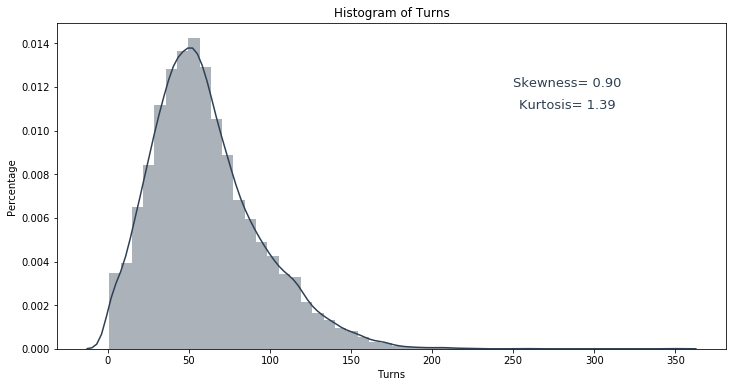

In [8]:
plt.figure(figsize= (12, 6))
sns.distplot(chess["turns"], color= "#2E4053")
plt.xlabel("Turns")
plt.ylabel("Percentage")
plt.title("Histogram of Turns")
plt.text(x= 250, y=.012, s="Skewness= {:.2f}".format(chess["turns"].skew()), fontsize=13, style="normal", 
         color= "#2E4053")
plt.text(x= 253.5, y=.011, s="Kurtosis= {:.2f}".format(chess["turns"].kurt()), fontsize=13, style="normal", 
         color= "#2E4053")
plt.show()

## Histogram plot of white and black colors

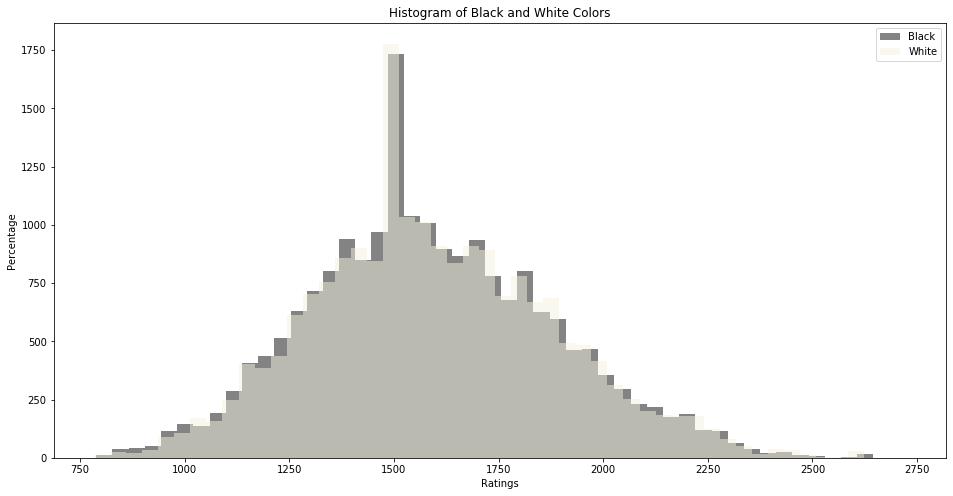

In [9]:
plt.figure(figsize= (16, 8))
sns.distplot(chess["black_rating"], color= "#003300", kde= False,\
             hist_kws={"linewidth": 3,"alpha": 0.5, "color": "#08080B"})
sns.distplot(chess["white_rating"], color= "#FF0033", kde= False,\
             hist_kws={"linewidth": 3,"alpha": 0.5, "color": "#F4F1DE"})
plt.legend(["Black", "White"])
plt.xlabel("Ratings")
plt.ylabel("Percentage")
plt.title("Histogram of Black and White Colors")
plt.show()

## Scatterplot of White rating Vs. Black Rating

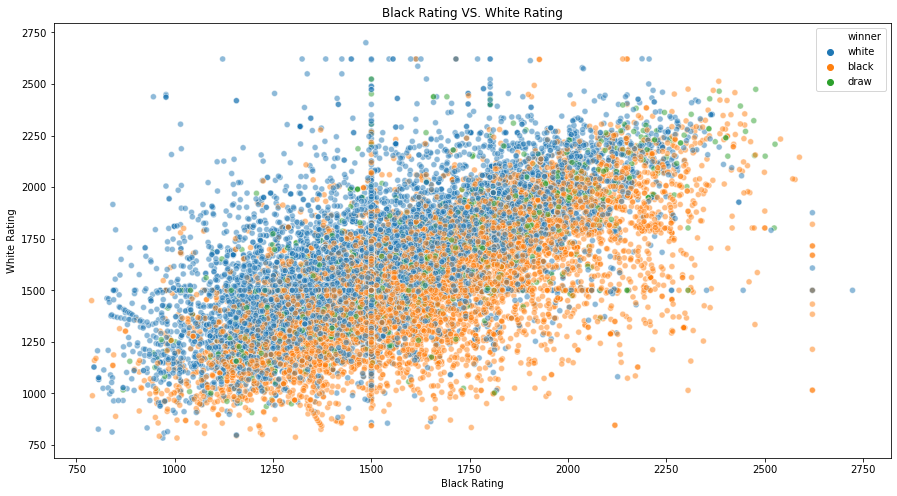

In [10]:
plt.figure(figsize= (15, 8))
sns.scatterplot(x= "black_rating", y= "white_rating", data= chess, hue= "winner", alpha= .5)
plt.xlabel("Black Rating")
plt.ylabel("White Rating")
plt.title("Black Rating VS. White Rating")
plt.show()

In [11]:
chess.head(2)

,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Add match_importance factor 

In [12]:
# define match_importance factor that is sum of both black and white rating, when we have higher match importance
# means that both players have high ratings.
chess["match_importance"] = chess["white_rating"] + chess["black_rating"]

In [13]:
chess.sort_values("match_importance", ascending= False)\
                 .loc[:, ["white_id", "white_rating", "winner", "black_id", "black_rating", "match_importance"]].head(10)

,white_id,white_rating,winner,black_id,black_rating,match_importance
757,amir2002zzz,2474,draw,vovaches,2477,4951
4426,lexisvar,2513,black,kerboodle,2383,4896
4423,chesspirate421,2458,black,kerboodle,2424,4882
761,amir2002zzz,2465,draw,fourninetysix,2384,4849
4427,falkenauge,2469,black,kerboodle,2369,4838
13555,zih07,2393,draw,jerusseust,2438,4831
19016,lance5500,2621,white,chessmageddon,2206,4827
4425,edo999_82,2420,black,kerboodle,2404,4824
10147,blitzbullet,2622,white,milancuruvija,2188,4810
637,loebas,2422,black,chesscarl,2386,4808


## Best Black rating players

In [14]:
chess.sort_values("black_rating",ascending= False).\
                drop_duplicates("black_id",keep="first").\
                drop_duplicates("black_rating",keep="last").iloc[:10,7:9]

,black_id,black_rating
4473,justicebot,2723
12080,lance5500,2621
5671,avill050,2588
15964,teatime007,2577
18996,tree33,2540
11344,marantz3,2526
13255,sparklehorse,2516
12458,chess-stat,2500
13109,vahapsanal,2499
18640,allmight87,2481


## Best White rating players

In [15]:
chess.sort_values("white_rating",ascending= False).\
                drop_duplicates("white_id",keep="first").\
                drop_duplicates("white_rating",keep="last").iloc[:10,5:7]

,white_id,white_rating
13009,justicebot,2700
10147,blitzbullet,2622
14114,lance5500,2621
8308,shahoviy_komentator,2586
15963,teatime007,2579
14113,le_truand,2549
12436,king-bullet,2522
4426,lexisvar,2513
12465,chess-stat,2500
5024,papasi,2489


## Donutplot of Winners

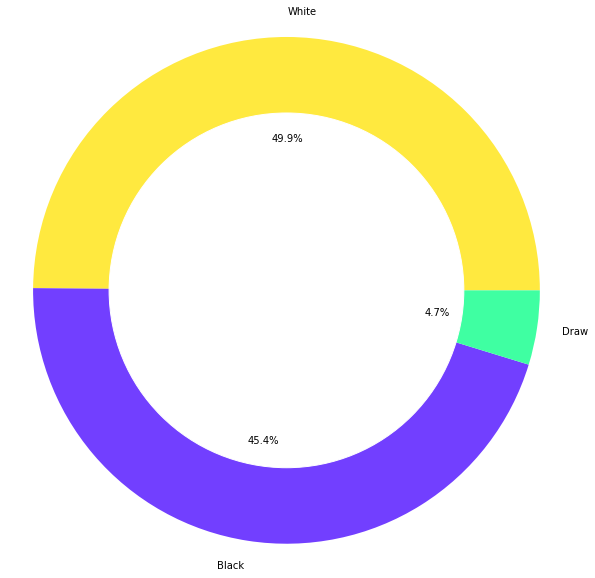

In [16]:
plt.figure(figsize= (10, 10))
# The slices will be ordered and plotted counter-clockwise
labels = ["White", "Black", "Draw"]
sizes = chess["winner"].value_counts().values
colors = ["#ffe93f", "#723fff", "#3fffa2"]
plt.pie(sizes,labels=labels, colors=colors,autopct="%1.1f%%")

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.7,color= "white", fc= "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis("equal")
plt.show()

## Barplot of Game status

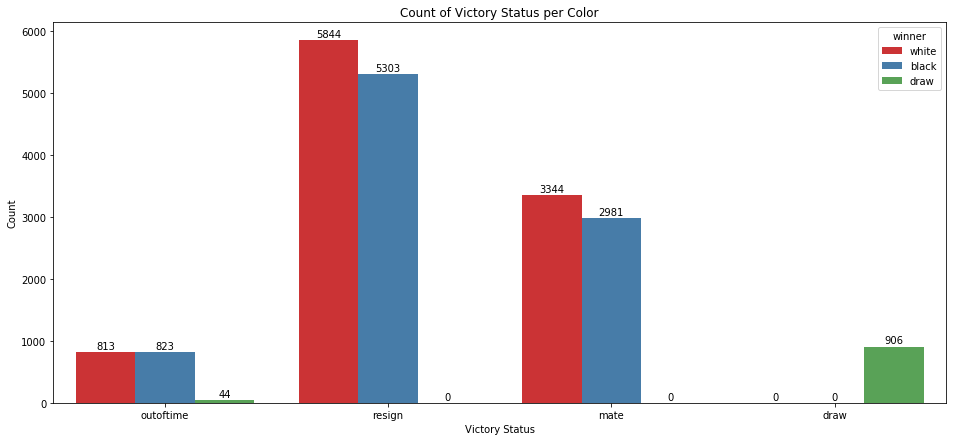

In [17]:
plt.figure(figsize=(16,7))
victory_status= sns.countplot(x= "victory_status",hue= "winner", data= chess, palette= "Set1")
plt.xlabel("Victory Status")
plt.ylabel("Count")
plt.title("Count of Victory Status per Color")
for p in victory_status.patches:
    height =  np.nan_to_num(p.get_height(), 0)
    text = str(int(height))
    victory_status.text(p.get_x()+p.get_width()/2,height + 50 ,text,ha="center")
plt.show()

## Rated Or NOT?

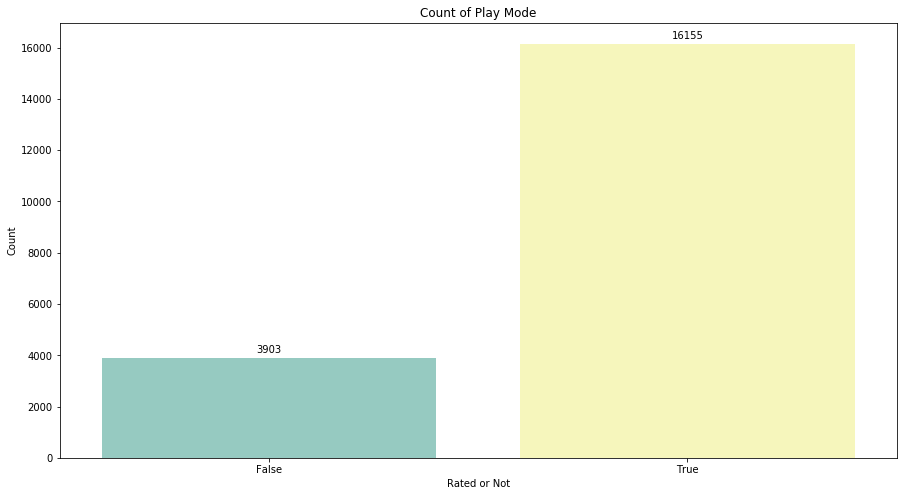

In [18]:
plt.figure(figsize= (15, 8))
rated= sns.countplot(x= "rated", data= chess, palette= "Set3")
plt.xlabel("Rated or Not")
plt.ylabel("Count")
plt.title("Count of Play Mode")
for p in rated.patches:
    height =  p.get_height()
    text = str(int(height))
    rated.text(p.get_x()+p.get_width()/2,height + 200 ,text,ha="center")
plt.show()

## Most frequent Opening plays

In [19]:
most_frequently_opening = chess["opening_name"].value_counts().nlargest(30)

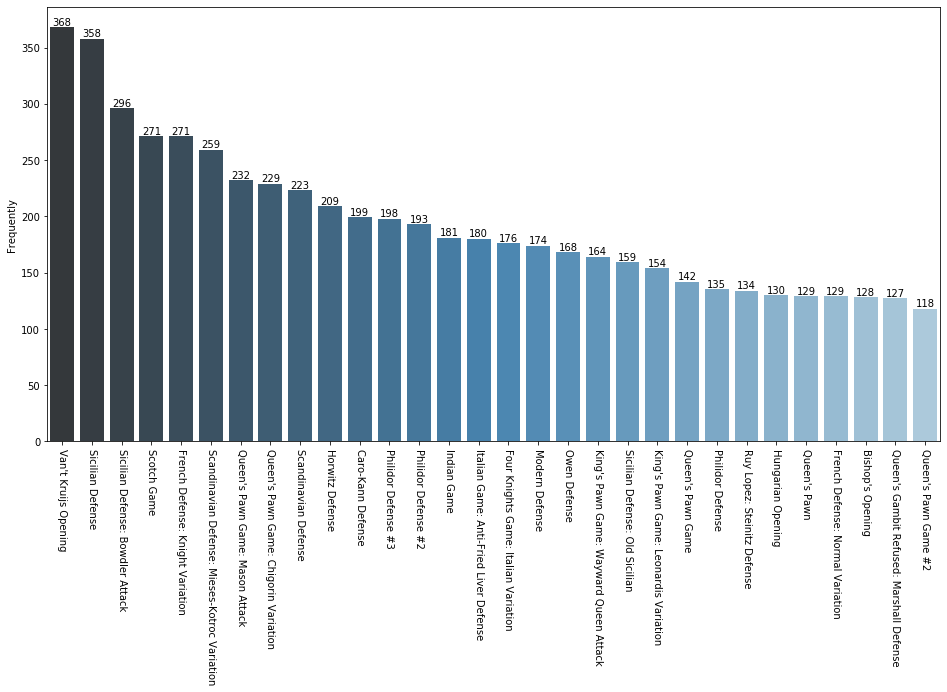

In [20]:
plt.figure(figsize= (16, 8))
opening= sns.barplot(x= most_frequently_opening.index, y= most_frequently_opening.values, palette="Blues_d")
plt.xticks(rotation = -90)
plt.ylabel("Frequently")
for p in opening.patches:
    height = p.get_height()
    text = str(int(height))
    opening.text(p.get_x()+p.get_width()/2,height + 2 ,text,ha="center")
plt.show()

In [21]:
# creating empty columns and initialized with "0" character
chess["initial_time"] = "0"
chess["addition_time"] = "0"
# put values of spliting increment_code to seprate columns,
# first is initial_time that for starting time and,
# second for addition_time per move that will increase time after complete move
for key, value in chess["increment_code"].items():
    chess.at[key, "initial_time"] = value.split("+")[0]
    chess.at[key, "addition_time"] = value.split("+")[1]

In [22]:
# change type of initial_time and addition_time from string to integer,
# then count of top 10 of frequently
chess["initial_time"] = chess["initial_time"].astype("int")
frequently_initial_time = chess["initial_time"].value_counts().nlargest(10)
chess["addition_time"] = chess["addition_time"].astype("int")
frequently_addition_time = chess["addition_time"].value_counts().nlargest(10)

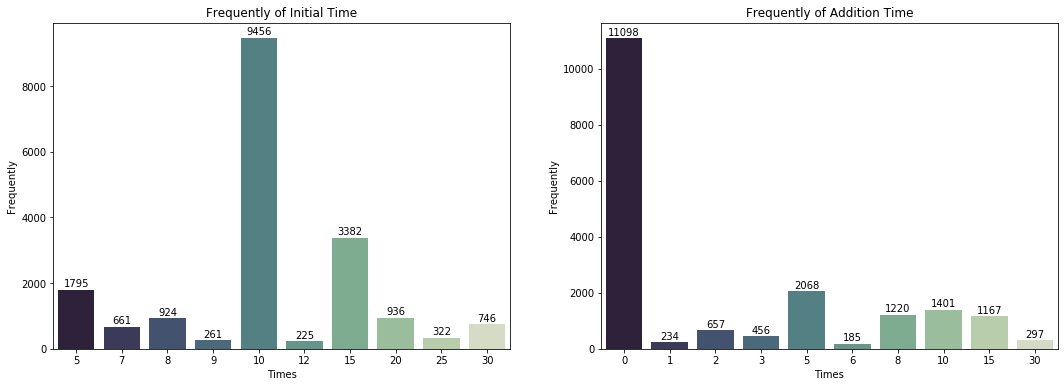

In [23]:
fig, axis = plt.subplots(1,2,figsize=(18,6))
# left plot
initial= sns.barplot(x= frequently_initial_time.index, y= frequently_initial_time.values, 
                   palette= sns.cubehelix_palette(10, start=.5, rot=-.75, reverse= True), ax=axis[0])
initial.set_xlabel("Times")
initial.set_ylabel("Frequently")
initial.set_title("Frequently of Initial Time")
# write number of occures each column on bars
for p in initial.patches:
    height = p.get_height()
    text = str(int(height))
    initial.text(p.get_x()+p.get_width()/2,height + 100 ,text,ha="center")
# right plot
addition= sns.barplot(x= frequently_addition_time.index, y= frequently_addition_time.values, 
                   palette= sns.cubehelix_palette(10, start=.5, rot=-.75, reverse= True), ax=axis[1])
addition.set_xlabel("Times")
addition.set_ylabel("Frequently")
addition.set_title("Frequently of Addition Time")
# write number of occures each column on bars
for p in addition.patches:
    height = p.get_height()
    text = str(int(height))
    addition.text(p.get_x()+p.get_width()/2,height + 100 ,text,ha="center")
# show both of them
plt.show()

## Most frequent Time of plays

In [24]:
# top 10 of most played times
frequently_increment_time = chess["increment_code"].value_counts().nlargest(10)

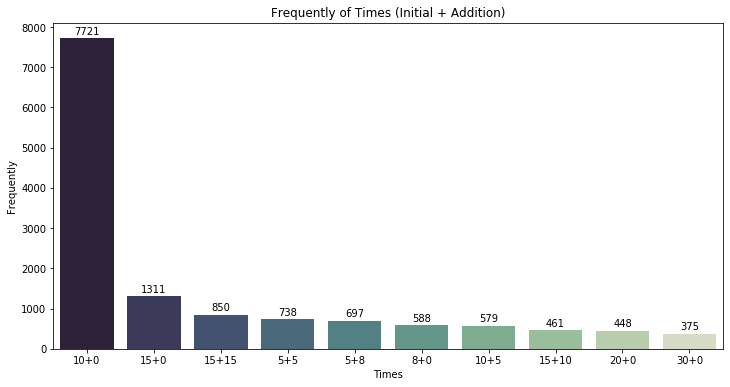

In [25]:
plt.figure(figsize= (12,6))
times= sns.barplot(x= frequently_increment_time.index, y= frequently_increment_time.values, 
                   palette= sns.cubehelix_palette(10, start=.5, rot=-.75, reverse= True) )
plt.xlabel("Times")
plt.ylabel("Frequently")
plt.title("Frequently of Times (Initial + Addition)")
# write number of occures each column on bars
for p in times.patches:
    height = p.get_height()
    text = str(int(height))
    times.text(p.get_x()+p.get_width()/2,height + 100 ,text,ha="center")
plt.show()

## Separate Moves into two turns, White moves and Black moves

In [26]:
chess["moves"]= chess["moves"].str.split()

In [27]:
# creating empty columns and initialized with "0" character
chess["black_moves"]= "0"
chess["white_moves"]= "0"
for key, value in chess["moves"].items():
    chess.at[key, "white_moves"] = value[0::2]
    chess.at[key, "black_moves"] = value[1::2]

In [28]:
chess["rating_diffrence"]= chess["white_rating"] - chess["black_rating"]

In [29]:
white_rating_black_winner, black_rating_white_winner, white_rating_white_winner, black_rating_black_winner= 0, 0, 0, 0

In [30]:
for key, value in chess["rating_diffrence"].items():
    if value >= 0 and chess["winner"].loc[key] == "white":
        white_rating_white_winner += 1
    if value >= 0 and chess["winner"].loc[key] == "black":
        white_rating_black_winner += 1
    if value < 0 and chess["winner"].loc[key] == "white":
        black_rating_white_winner += 1
    if value < 0 and chess["winner"].loc[key] == "black":
        black_rating_black_winner += 1

In [31]:
print("Proportion of matches that black rating higher than white rating but white WIN the game: {:.2f}"\
      .format(black_rating_white_winner / (black_rating_black_winner + black_rating_white_winner)))

Proportion of matches that black rating higher than white rating but white WIN the game: 0.37


In [32]:
print("Proportion of matches that white rating higher than black rating but black WIN the game: {:.2f}"\
      .format(white_rating_black_winner / (white_rating_white_winner + white_rating_black_winner)))

Proportion of matches that white rating higher than black rating but black WIN the game: 0.33
